In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Colorblind palette
sns.set_palette("colorblind")

V_0 = 121.74275991759016, b = 0.24797175841165553


Text(120, 5, 'V_0 = 121.74\nb = 0.25')

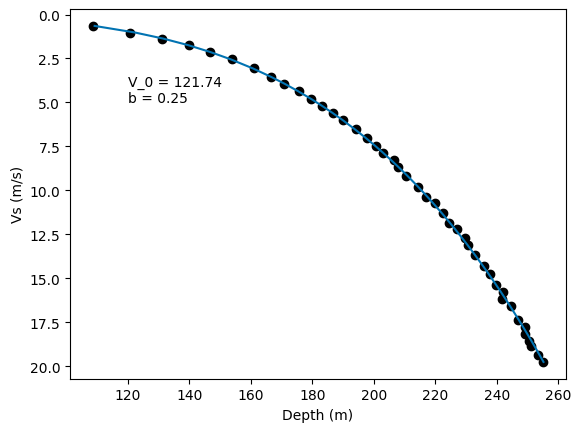

In [277]:
# Using data extracted get the Menqs function parameters
from scipy.optimize import curve_fit
Menq_func = lambda z, V_0, b: V_0 * z ** b

data_extracted = pd.read_csv("Default Dataset (1).csv", header=None)

popt, pcov = curve_fit(Menq_func, data_extracted[1], data_extracted[0])
V_0, b = popt
print(f"V_0 = {V_0}, b = {b}")

# Plot the data and the fit
plt.scatter(data_extracted[0], data_extracted[1], label="Data", color="black")
plt.plot(Menq_func(data_extracted[1], V_0, b), data_extracted[1], label="Fit")
plt.gca().invert_yaxis()
plt.xlabel("Depth (m)")
plt.ylabel("Vs (m/s)")
plt.text(120, 5, f"V_0 = {V_0:.2f}\nb = {b:.2f}")

In [278]:
# Define ranges of Vs

# Menq equation is a power law
Vs_menq = lambda z: V_0 * z**b
Vs_menq = np.vectorize(Vs_menq)

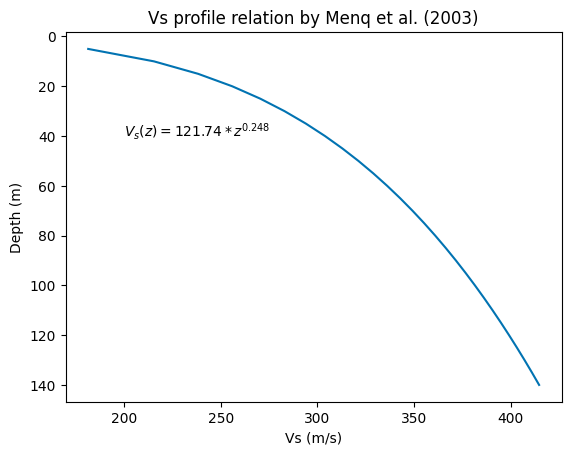

In [281]:
# Given a set of depths from 5 to 145 m, calculate Vs
depths = np.arange(5, 145, 5)

Vs = Vs_menq(depths)

# Plot Vs
plt.plot(Vs, depths)
plt.xlabel('Vs (m/s)')
plt.ylabel('Depth (m)')
plt.title('Vs profile relation by Menq et al. (2003)')
plt.text(200, 40, r'$V_s (z) = 121.74*z^{0.248}$', fontsize=10)
plt.gca().invert_yaxis()

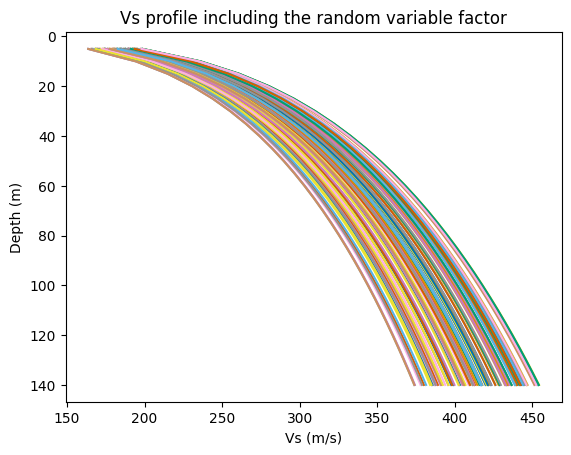

In [282]:
n_realization = 100 # Number of realizations

# Define a random uniform variable between 0.9 and 1.1
random = np.random.uniform(0.9, 1.1, n_realization)

# Apply the random variable to Vs
Vs_random = []
for i in range(n_realization):
    Vs_random.append(Vs * random[i])
Vs_random = np.array(Vs_random)

# Plot Vs_random
plt.plot(Vs_random.T, depths)
plt.gca().invert_yaxis()
plt.xlabel('Vs (m/s)')
plt.ylabel('Depth (m)')
plt.title('Vs profile including the random variable factor')
plt.show()
